# Exploring the Potential of New AI Technologies in Industry

## Overview
This assignment explores the use of emerging AI technologies in real-world applications, focusing on predictive maintenance, industrial automation, and simulated environments. By integrating machine learning models with tools like **Factory I/O** and utilizing data connections such as **Modbus**, we simulate and analyze industrial processes effectively.

In [29]:
data_dict = {
    'Type': 'Type of the product (categorical)',
    'Air temperature [K]': 'Air temperature in Kelvin',
    'Process temperature [K]': 'Process temperature in Kelvin',
    'Rotational speed [rpm]': 'Rotational speed in revolutions per minute',
    'Torque [Nm]': 'Torque in Newton meters',
    'Tool wear [min]': 'Tool wear time in minutes',
    'Machine failure': 'Overall machine failure (1=Yes, 0=No)',
    'TWF': 'Tool Wear Failure (1=Yes, 0=No)',
    'HDF': 'Heat Dissipation Failure (1=Yes, 0=No)',
    'PWF': 'Power Failure (1=Yes, 0=No)',
    'OSF': 'Overstrain Failure (1=Yes, 0=No)',
    'RNF': 'Random Failures (1=Yes, 0=No)'
}
print("Data Dictionary:")
for key, value in data_dict.items():
    print(f"- {key}: {value}")

Data Dictionary:
- Type: Type of the product (categorical)
- Air temperature [K]: Air temperature in Kelvin
- Process temperature [K]: Process temperature in Kelvin
- Rotational speed [rpm]: Rotational speed in revolutions per minute
- Torque [Nm]: Torque in Newton meters
- Tool wear [min]: Tool wear time in minutes
- Machine failure: Overall machine failure (1=Yes, 0=No)
- TWF: Tool Wear Failure (1=Yes, 0=No)
- HDF: Heat Dissipation Failure (1=Yes, 0=No)
- PWF: Power Failure (1=Yes, 0=No)
- OSF: Overstrain Failure (1=Yes, 0=No)
- RNF: Random Failures (1=Yes, 0=No)


## Types of Failures and Their Relationship with Machine Failure

The dataset includes several columns that indicate specific types of machine failures, which are related to the overall `Machine failure`. Below is an explanation of these types:

- **TWF (Tool Wear Failure):** Indicates that the failure was caused by excessive wear on the tool.
- **HDF (Heat Dissipation Failure):** Indicates that the failure was due to inadequate heat dissipation.
- **PWF (Power Failure):** Indicates that the failure occurred because of a power issue.
- **OSF (Overstrain Failure):** Indicates that the failure occurred due to mechanical overstrain.
- **RNF (Random Failures):** Represents unpredictable failures not tied to a specific type.

By analyzing these columns, we can explore how each contributes to the overall machine failure. For instance, visualizations can be used to reveal patterns between these individual failure modes and the `Machine failure` column.

In [30]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from tpot import TPOTClassifier
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE

In [31]:
# Load dataset from URL
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00601/ai4i2020.csv'
df = pd.read_csv(url)

# Show the first rows
print("Dataset:")
display(df.head())

# Describe basic statistics of numeric columns
print("Statistical description:")
display(df.describe())

# View general information about the dataset
print("Dataset information:")
df.info()

Dataset:


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


Statistical description:


,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes:

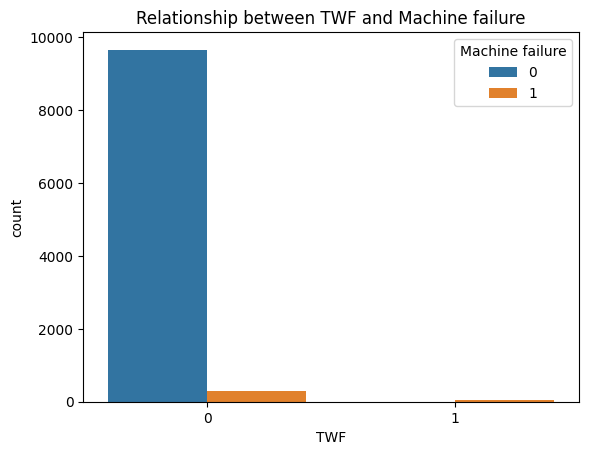

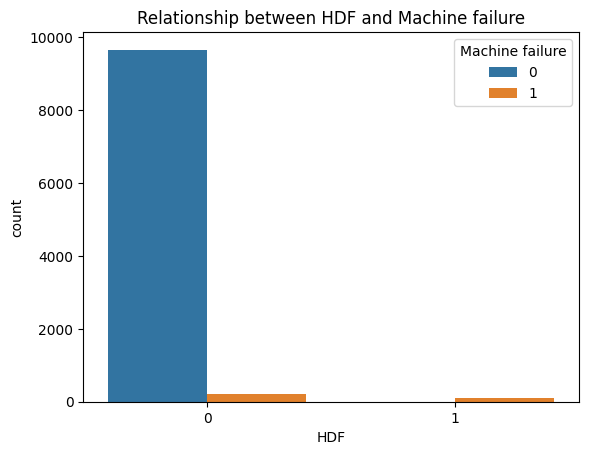

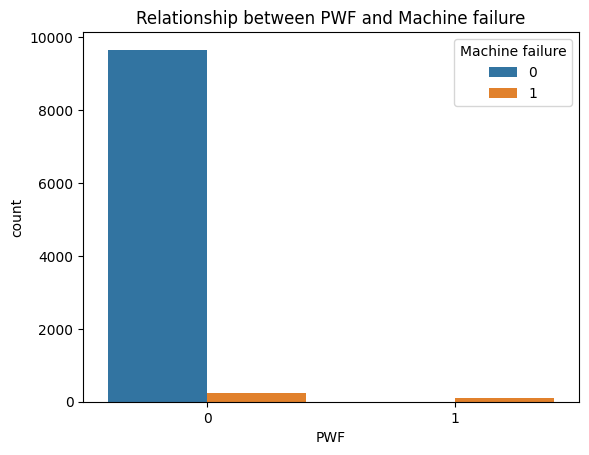

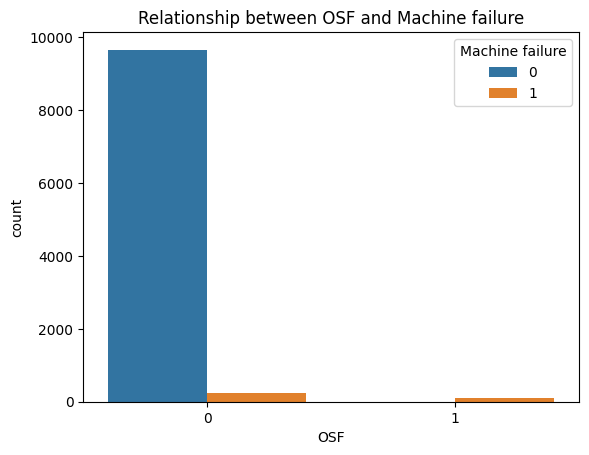

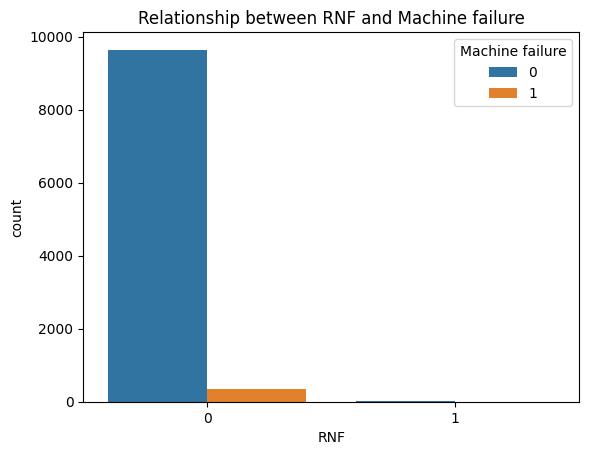

In [32]:
for failure_type in ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']:
    sns.countplot(data=df, x=failure_type, hue="Machine failure")
    plt.title(f"Relationship between {failure_type} and Machine failure")
    plt.show()

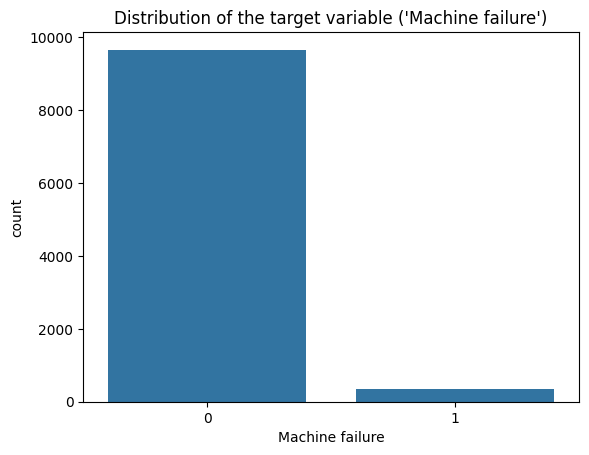


Null values ​​in the dataset:
UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64


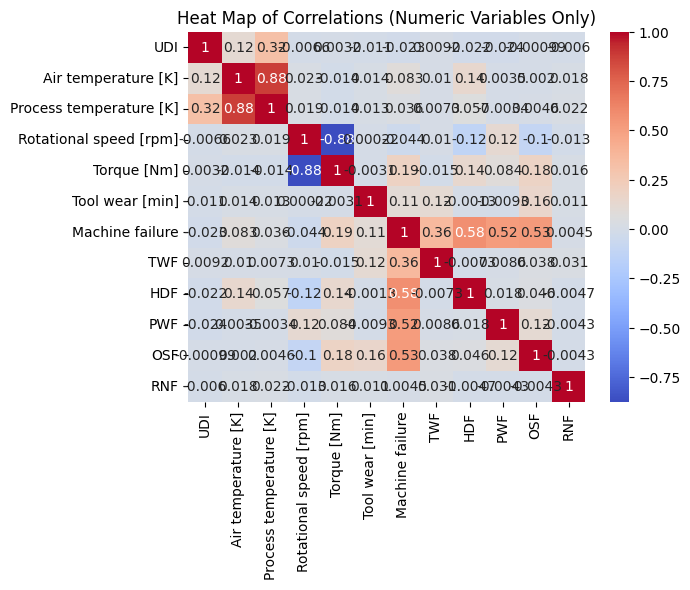

In [33]:
# Distribution of the target variable
sns.countplot(data=df, x="Machine failure")
plt.title("Distribution of the target variable ('Machine failure')")
plt.show()

# Check for null values
print("\nNull values ​​in the dataset:")
print(df.isnull().sum())

# Displaying correlations (excluding categorical columns)
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
corr = df[numerical_columns].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Heat Map of Correlations (Numeric Variables Only)")
plt.show()

In [34]:
# Delete irrelevant columns
df = df.drop(columns=["Product ID", "UDI"])  
# Convert the 'Type' column to numeric values
label_encoder = LabelEncoder()
df['Type'] = label_encoder.fit_transform(df['Type'])

# Show coded categories
print("Categories coded for 'Type':", label_encoder.classes_)

# Define features (X) by excluding all target-related columns
X = df.drop(columns=["Machine failure", "TWF", "HDF", "PWF", "OSF", "RNF"])  # Exclude all output variables
y = df["Machine failure"]  # Define the primary target variable

Categories coded for 'Type': ['H' 'L' 'M']


In [35]:
# Preview after cleaning irrelevant columns
print("First rows of the cleaned dataset:")
display(df.head())

# General information about the dataset
print("\nClean dataset information:")
df.info()

# Descriptive statistics of numeric columns
print("\nDescriptive statistics:")
display(df.describe())

First rows of the cleaned dataset:


,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,2,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,1,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,1,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,1,298.2,308.7,1408,40.0,9,0,0,0,0,0,0



Clean dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  int32  
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Machine failure          10000 non-null  int64  
 7   TWF                      10000 non-null  int64  
 8   HDF                      10000 non-null  int64  
 9   PWF                      10000 non-null  int64  
 10  OSF                      10000 non-null  int64  
 11  RNF                      10000 non-null  int64  
dtypes: float64(3), int32(1), int64(8)
memory usage: 898.6 KB

Descriptive statistics:


,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,1.19940,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,0.60023,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,0.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1.00000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.00000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,2.00000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,2.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [36]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Class distribution before SMOTE:
Machine failure
0    7729
1     271
Name: count, dtype: int64

Class distribution after SMOTE:
Machine failure
0    7729
1    7729
Name: count, dtype: int64


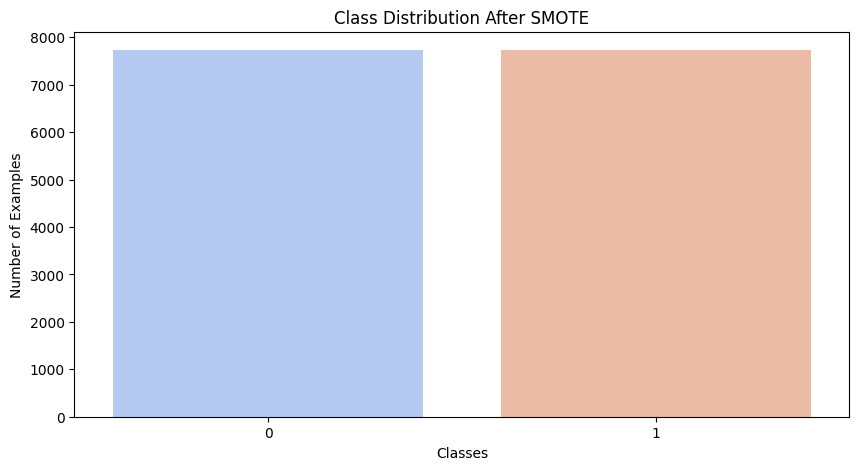

In [37]:
# Print the original distribution of the target variable (before SMOTE)
print("Class distribution before SMOTE:")
print(y_train.value_counts())

# Apply SMOTE to balance classes in the training set

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Print the balanced distribution of the target variable (after SMOTE)
print("\nClass distribution after SMOTE:")
print(pd.Series(y_train_balanced).value_counts())

# Balanced distribution of the target variable after SMOTE
plt.figure(figsize=(10, 5))
sns.countplot(x=y_train_balanced, hue=y_train_balanced, palette="coolwarm", dodge=False, legend=False)
plt.title("Class Distribution After SMOTE")
plt.xlabel("Classes")
plt.ylabel("Number of Examples")
plt.show()

## Addressing Imbalanced Data with SMOTE

In our project, we used **SMOTE (Synthetic Minority Oversampling Technique)** to address the severe imbalance in our dataset. The minority class (`Machine failure = 1`) had significantly fewer instances compared to the majority class (`Machine failure = 0`), which led our model to favor the majority class. This imbalance caused issues such as:
- **Overfitting to the majority class:** The model struggled to generalize and detect failures in the minority class effectively.

### Why SMOTE?
SMOTE helps balance the dataset by generating synthetic samples for the minority class. These samples are created by interpolating between existing minority class samples, ensuring that the new data stays realistic while improving class balance.

In [38]:
# Tuned preprocessor settings
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']),
    ('passthrough_cat', 'passthrough', ['Type'])  
])
#StandardScaler()MinMaxScaler()
# Apply the preprocessor to the training and test set
X_train_preprocessed = preprocessor.fit_transform(X_train_balanced)
X_test_preprocessed = preprocessor.transform(X_test)

## Data Normalization with StandardScaler

The `StandardScaler` was selected for normalization in this project. This scaler standardizes features by removing the mean and scaling to unit variance, which is particularly suitable for algorithms sensitive to the magnitude of feature values, such as K-Nearest Neighbors (KNN). This ensures consistency and comparability across all numerical variables.

In [39]:
# Get the names of the processed columns
processed_columns = (
    preprocessor.transformers_[0][2] +  # Numeric column names
    preprocessor.transformers_[1][1].get_feature_names_out(['Type']).tolist()  # Coded category names
)

# Validate the number of names generated
print("\nNames of the processed columns:")
print(processed_columns)
print("Number of names generated:", len(processed_columns))
print("Total number of columns processed (training data):", X_train_preprocessed.shape[1])

# Create the DataFrame only if the names match the processed columns for training data
if len(processed_columns) == X_train_preprocessed.shape[1]:
    X_train_processed_df = pd.DataFrame(X_train_preprocessed, columns=processed_columns)
    
    # Display the first rows of the processed training DataFrame
    print("\nTraining Data after preprocessing:")
    display(X_train_processed_df.head())
    
    # General information about the processed training DataFrame
    print("\nProcessed Training DataFrame Information:")
    X_train_processed_df.info()
    
    # Display descriptive statistics for the training data
    print("\nDescriptive statistics of the processed training data:")
    display(X_train_processed_df.describe())
else:
    print("Error: Column names do not match processed training data.")


Names of the processed columns:
['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Type']
Number of names generated: 6
Total number of columns processed (training data): 6

Training Data after preprocessing:


,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type
0,0.788889,0.548215,-0.214936,0.167420,-0.988097,2.0
1,-1.792396,-1.414415,-0.405185,0.110965,0.114279,2.0
2,0.272632,1.076615,-0.545369,0.054509,0.184944,2.0
3,-0.811508,-0.282128,-0.365133,0.809599,-0.564106,1.0
4,-1.740771,-1.263443,0.709606,-1.138110,-1.044629,1.0



Processed Training DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15458 entries, 0 to 15457
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Air temperature [K]      15458 non-null  float64
 1   Process temperature [K]  15458 non-null  float64
 2   Rotational speed [rpm]   15458 non-null  float64
 3   Torque [Nm]              15458 non-null  float64
 4   Tool wear [min]          15458 non-null  float64
 5   Type                     15458 non-null  float64
dtypes: float64(6)
memory usage: 724.7 KB

Descriptive statistics of the processed training data:


,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type
count,1.545800e+04,1.545800e+04,1.545800e+04,1.545800e+04,1.545800e+04,15458.000000
mean,1.618004e-16,-2.071045e-14,4.780466e-17,-1.765095e-16,5.883651e-17,1.085716
std,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,0.528016
min,-2.670033e+00,-3.377044e+00,-1.176194e+00,-2.895282e+00,-1.751281e+00,0.000000
25%,-8.115079e-01,-7.350430e-01,-5.386932e-01,-6.300117e-01,-8.750328e-01,1.000000
50%,6.612902e-02,9.530026e-02,-3.017166e-01,1.183946e-01,4.361418e-02,1.000000
75%,8.721058e-01,6.944377e-01,1.488726e-01,6.994395e-01,9.763942e-01,1.000000
max,2.079531e+00,2.737302e+00,4.557972e+00,2.242153e+00,1.824376e+00,2.000000


Version 0.12.2 of tpot is outdated. Version 1.0.0 was released Wednesday February 26, 2025.


Optimization Progress:   0%|          | 0/30 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9433302167164783

Generation 2 - Current best internal CV score: 0.9433302167164783

Best pipeline: KNeighborsClassifier(input_matrix, n_neighbors=21, p=1, weights=distance)
Best pipeline found by TPOT:
Pipeline(steps=[('kneighborsclassifier',
                 KNeighborsClassifier(n_neighbors=21, p=1,
                                      weights='distance'))])

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1932
           1       0.21      0.76      0.32        68

    accuracy                           0.89      2000
   macro avg       0.60      0.83      0.63      2000
weighted avg       0.96      0.89      0.92      2000



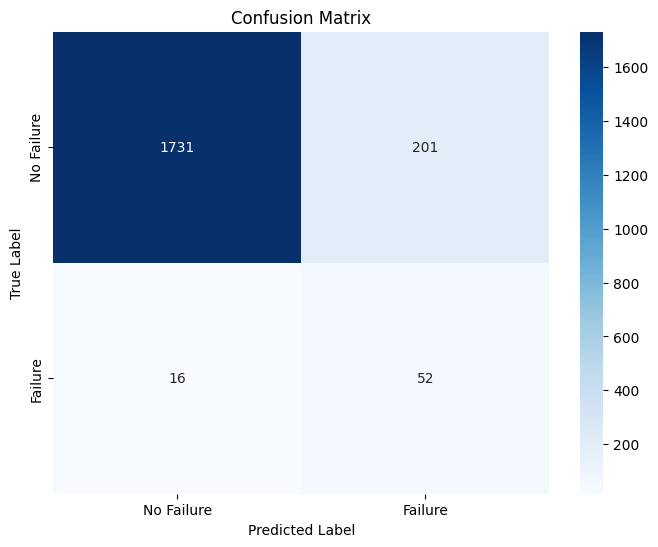

In [40]:
# Configure TPOT to automate the search for the best model
tpot = TPOTClassifier(
    generations=2,
    population_size=10,
    verbosity=2,
    random_state=42,
    config_dict='TPOT light',  # Use fast models to reduce execution time
    n_jobs=-1  # Use all CPU cores for speed
)

# Train the model
tpot.fit(X_train_preprocessed, y_train_balanced)

# Evaluate the model on the test set
y_pred = tpot.predict(X_test_preprocessed)

# Print the best pipeline found by TPOT
print("Best pipeline found by TPOT:")
print(tpot.fitted_pipeline_)

# Model Evaluation: Classification Metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Failure", "Failure"], yticklabels=["No Failure", "Failure"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## Performance Metrics Explained

The metrics below provide a comprehensive evaluation of the model:

- **Accuracy:** Proportion of correctly predicted instances out of the total.
- **Precision:** For a given class, the proportion of true positives (correctly predicted) out of all predicted positives.  
  - High precision means few false positives.
- **Recall:** For a given class, the proportion of true positives out of all actual positives.  
  - High recall means fewer false negatives.
- **F1-Score:** The harmonic mean of precision and recall.  
  - Balances precision and recall, especially useful for imbalanced datasets.
- **Macro Avg:** Average performance across all classes (unweighted).
- **Weighted Avg:** Performance weighted by the number of instances in each class.

### Metrics Summary from the Model:
- **Overall Accuracy:** 89%
- **Class-Specific Performance:**
  - Class `0 (No Failure)` has very high precision (0.99), indicating that the model rarely predicts `No Failure` incorrectly.
  - Class `1 (Failure)` shows lower precision (0.21) but achieves decent recall (0.76), highlighting the model's ability to identify actual failures.

The lower F1-score for `Failure` suggests room for improvement in balancing precision and recall.


## Hyperparameter Tuning with TPOT

Hyperparameter tuning in this project is automated using TPOT (Tree-based Pipeline Optimization Tool). TPOT iteratively searches for the best machine learning pipeline by evaluating different combinations of algorithms and hyperparameter settings. 

### Key Details:
- **Generations:** 2
- **Population Size:** 10
- **Configuration:** Lightweight models (`TPOT light`) for faster experimentation.

The best pipeline found is:
```python
KNeighborsClassifier(input_matrix, n_neighbors=21, p=1, weights='distance')


ExactExplainer explainer: 2001it [05:03,  6.48it/s]                          
C:\Users\usuario\AppData\Local\Temp\ipykernel_18176\1373056909.py:23: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test_preprocessed, feature_names=processed_columns)
C:\Users\usuario\anaconda3\envs\GeorgianColege\Lib\site-packages\shap\plots\_beeswarm.py:718: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
C:\Users\usuario\anaconda3\envs\GeorgianColege\Lib\site-packages\shap\plots\_beeswarm.py:738: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function w

<Figure size 640x480 with 0 Axes>

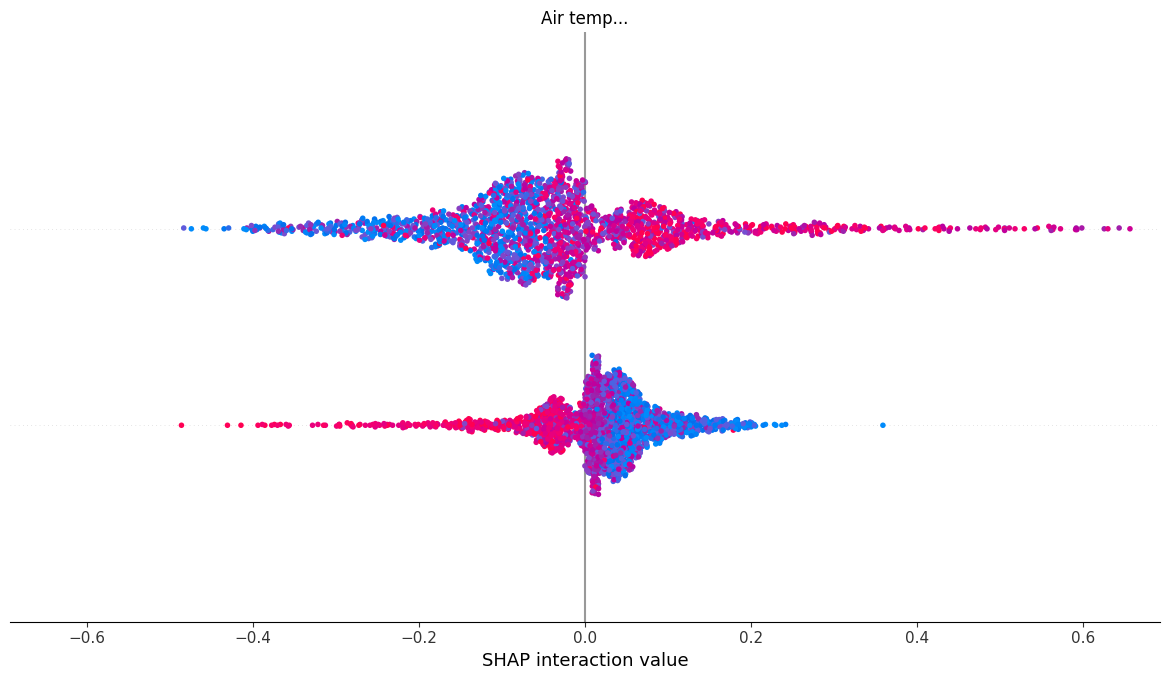

In [16]:
class PipelineWrapper:
    def __init__(self, pipeline):
        self.pipeline = pipeline  # save the model 

    def predict(self, X):
        # use the predict method of the original model
        return self.pipeline.predict(X)

    def predict_proba(self, X):
        # use the predict_proba method of the original model
        return self.pipeline.predict_proba(X)
        
# created a wrapper for SHAP to work
wrapped_pipeline = PipelineWrapper(tpot.fitted_pipeline_)

import shap

# create the SHAP Explainer object using the wrapped pipeline
explainer = shap.Explainer(wrapped_pipeline.predict_proba, X_test_preprocessed)
shap_values = explainer(X_test_preprocessed)

# We generate graph
shap.summary_plot(shap_values, X_test_preprocessed, feature_names=processed_columns)

In [13]:
import joblib

# Save the trained model
joblib.dump(tpot.fitted_pipeline_, 'trained_model.pkl')

print("Model saved as 'trained_model.pkl'")

Model saved as 'trained_model.pkl'


In [41]:
import joblib

# Guardar el modelo entrenado
joblib.dump(loaded_model, 'trained_model.pkl')

# Guardar el preprocesador y el codificador
joblib.dump(preprocessor, 'preprocessor.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')

print("Modelo, preprocesador y codificador guardados correctamente.")


Modelo, preprocesador y codificador guardados correctamente.


In [1]:
import joblib
# Load the trained model
loaded_model = joblib.load('trained_model.pkl')

print("Model loaded successfully")

Model loaded successfully


In [4]:
import joblib
# Cargar los elementos previamente guardados
loaded_model = joblib.load('trained_model.pkl')
preprocessor = joblib.load('preprocessor.pkl')
label_encoder = joblib.load('label_encoder.pkl')

print("Modelo, preprocesador y codificador cargados correctamente.")


Modelo, preprocesador y codificador cargados correctamente.


In [7]:
import pandas as pd
def prepare_input_data(input_data, scaler, label_encoder):
    """
    Prepares input data by applying the necessary coding and normalization.
    :param input_data: List with raw input values.
    :param scaler: Scaler (MinMaxScaler) already trained.
    :param label_encoder: Label encoder already trained for 'Type'.
    :return: Processed array ready for modeling.
    """
    # Define the original columns
    columns = ['Type', 'Air temperature [K]', 'Process temperature [K]', 
               'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
    
    # Convert input data to a DataFrame
    input_df = pd.DataFrame([input_data], columns=columns)

    # Encode the 'Type' column using the LabelEncoder
    input_df['Type'] = label_encoder.transform(input_df['Type'])

    # Normalize all numeric columns using the trained scaler (MinMaxScaler)
    processed_data = scaler.transform(input_df)
    
    return processed_data


# Example of input data
input_example = ['L', 300.0, 310.0, 2861, 42.0, 6000]  # Adjusted for motors' realistic operation time

# Preprocess the input data
processed_input = prepare_input_data(input_example, preprocessor, label_encoder)

# Predict failure using the loaded model
output = loaded_model.predict(processed_input)
result = 'Failure' if output[0] == 1 else 'No Failure'

# Access the tool wear value directly from the input
current_tool_wear = input_example[-1]  # Tool wear [min] is the last element in input_example

# Show the prediction result and provide context
print(f"\nPrediction for the data entered with the loaded model: {result}")

if result == 'Failure':
    # If the model predicts failure
    print(f"The tool wear is {current_tool_wear} minutes.")
    if current_tool_wear > 10000:  # Example threshold for high wear
        print("This indicates that the failure is likely due to prolonged usage.")
    else:
        print("This suggests the failure might be caused by another factor (e.g., mechanical stress).")
else:
    # If the model predicts no failure
    print(f"The tool wear is {current_tool_wear} minutes.")
    if current_tool_wear > 10000:  # Example threshold for recommending maintenance
        print("Although no failure is predicted, the tool wear is extremely high.")
        print("A maintenance check should be scheduled immediately to avoid potential failures.")
    elif current_tool_wear > 5000:  # Lower threshold for moderate wear
        print("Although no failure is predicted, the tool wear is significant.")
        print("Consider scheduling a maintenance check soon to ensure reliable operation.")
    else:
        print("The tool wear is within acceptable limits. No immediate maintenance is needed.")


Prediction for the data entered with the loaded model: Failure
The tool wear is 6000 minutes.
This suggests the failure might be caused by another factor (e.g., mechanical stress).


## Importance of Tool Wear and Mean Time Between Failures (MTBF) in Predictive Maintenance

In our code, we use **Tool wear [min]** and the concept of **Mean Time Between Failures (MTBF)** to enhance predictions and provide actionable recommendations. These metrics are crucial for understanding machinery operation and planning maintenance.

### How It Helps
- **Failure Prediction:** The model uses `Tool wear [min]` to predict whether a machine will fail (`Failure`) or continue operating normally (`No Failure`).
- **Preventive Maintenance:** Based on the MTBF and `Tool wear [min]`, the system provides:
  - **Proactive Recommendations:** If the tool wear exceeds a certain threshold (e.g., 10,000 minutes), it suggests immediate maintenance.
  - **Monitoring of Moderate Wear:** For tool wear over 5,000 minutes but below critical levels, it recommends scheduling maintenance soon to ensure reliability.

### Implementation in Code
In the workflow, once a prediction is made, we evaluate the `Tool wear [min]` to determine the level of wear:
- If the predicted result is `Failure`, `Tool wear [min]` helps identify if the failure is due to prolonged usage or other factors.
- If the prediction is `No Failure`, the system uses `Tool wear [min]` to recommend preventive maintenance for high or moderate wear levels.

This integration ensures smarter maintenance decisions, reducing downtime and increasing the operational efficiency ofthe equipment.


## Modbus Connection and Its Use in Industrial Simulations with Factory I/O

### What is Modbus?
Modbus is a widely used communication protocol in industrial automation. It enables the exchange of data between devices such as sensors, actuators, and controllers (e.g., PLCs). Its simplicity, reliability, and compatibility with various devices make it a standard in industries for monitoring and controlling processes.

### How We Use Modbus in Our Project
In our project, we leverage the **Modbus TCP** protocol to connect with **Factory I/O**, a powerful 3D simulation tool for industrial environments. This connection allows us to simulate real-world scenarios by using potentiometers to emulate the behavior of analog sensors. The potentiometer values are read via Modbus and serve as inputs to our machine learning model.

### Workflow
1. **Factory I/O Simulation**:
   - Factory I/O simulates an industrial environment with virtual sensors and actuators.
   - Potentiometers are used to mimic analog sensor readings, such as temperature, speed, or torque.

2. **Modbus Communication**:
   - A Modbus TCP client reads the potentiometer values from Factory I/O.
   - These values are scaled and processed to match the expected input format of our model.

3. **Integration with the Model**:
   - The sensor data (e.g., air temperature, process temperature, rotational speed, torque, and tool wear) is fed into our machine learning model.
   - The model predicts potential failures or provides insights for preventive maintenance.

### Why This Approach is Effective
- **Realistic Testing**: Factory I/O provides a safe and controlled environment to test our model with simulated sensor data.
- **Flexibility**: Modbus allows seamless communication between the simulation and our system, making it easy to adapt to different scenarios.
- **Preventive Maintenance**: By simulating sensor inputs, we can evaluate how our model responds to various conditions, ensuring it performs well in real-world applications.

This setup bridges the gap between simulation and real-world industrial processes, enabling us to refine our model and improve its reliability.

## Simulation and Configuration in Factory I/O

Factory I/O is a powerful industrial simulation tool that allows us to create virtual environments for testing and analyzing industrial systems. In this project, we used Factory I/O to simulate sensor data such as temperature, speed, torque, and tool wear. These values were sent to our machine learning model using potentiometers to mimic analog sensors, connected through Modbus TCP.

### Simulation Environment
Below are some images of the Factory I/O setup we configured for this project:

### 1. General Environment Configuration
![Simulation Environment](1.png)

### 2. Potentiometers for Sensor Simulation
![Modbus Connection Setup](2.png)

### 3. Modbus Configuration
![Potentiometer Usage in Factory I/O](3.png)

These images showcase how we integrated the Factory I/O simulation environment with our predictive maintenance model, enabling realistic testing and validation of sensor data flows.

## Download the Factory I/O Configuration File

Click the link below to download the configuration file:

[Download emergeiafactoryio.rar](./emergeiafactoryio.rar)

In [15]:
from pymodbus.client import ModbusTcpClient
from pymodbus.exceptions import ModbusException

# Configure Modbus client for Factory I/O
client = ModbusTcpClient('192.168.68.56', port=502)  

try:
    # Connect to Modbus server
    if client.connect():
        print("Connection established with Factory I/O.")

        # Read all 5 potentiometer registers in a single request
        start_address = 0  # Initial address
        num_registers = 5  # Read the 5 channels of the potentiometers

        response = client.read_input_registers(address=start_address, count=num_registers, slave=1)

        # Check if the answer is valid
        if response.isError():
            print("Error reading Modbus registers.")
        else:
            # Scaling and assigning values ​​to individual variables
            Air_temperature = response.registers[0] / 10.0  # Potentiometer 1
            Process_temperature = response.registers[1] / 10.0  # Potentiometer 2
            Rotational_speed = response.registers[2] / 10.0  # Potentiometer 3
            Torque = response.registers[3] / 10.0  # Potentiometer 4
            Tool_wear = response.registers[4] / 10.0  # Potentiometer 5

            # Show values
            print("Potentiometer values:")
            print(f"  - Air temperature [K]: {Air_temperature}")
            print(f"  - Process temperature [K]: {Process_temperature}")
            print(f"  - Rotational speed [rpm]: {Rotational_speed}")
            print(f"  - Torque [Nm]: {Torque}")
            print(f"  - Tool wear [min]: {Tool_wear}")

    else:
        print("Failed to connect to Modbus server on Factory I/O.")

except ModbusException as e:
    print(f"Modbus communication error: {e}")

finally:
    client.close()
    print("Connection closed.")

Connection established with Factory I/O.
Potentiometer values:
  - Air temperature [K]: 100.0
  - Process temperature [K]: 100.0
  - Rotational speed [rpm]: 100.0
  - Torque [Nm]: 100.0
  - Tool wear [min]: 87.0
Connection closed.


In [16]:
input_example = ['M', Air_temperature, Process_temperature, Rotational_speed, Torque, Tool_wear] 

# Preprocess and predict using the loaded model
processed_input = prepare_input_data(input_example, preprocessor, label_encoder)
output = loaded_model.predict(processed_input)

# Show the prediction result
result = 'Failure' if output[0] == 1 else 'No Failure'
print(f"\nPrediction for the data entered with the loaded model: {result}")

# Access the Tool wear [min] value directly from the input
current_tool_wear = Tool_wear  # Tool wear [min] value passed as part of input_example

# Provide additional context and recommendations based on Tool wear
print(f"The tool wear is {current_tool_wear} minutes.")

if result == 'Failure':
    # If the model predicts failure
    if current_tool_wear > 10000:  # Threshold for high wear
        print("This indicates that the failure is likely due to prolonged usage.")
    else:
        print("This suggests the failure might be caused by another factor (e.g., mechanical stress).")
else:
    # If the model predicts no failure
    if current_tool_wear > 10000:  # Threshold for recommending immediate maintenance
        print("Although no failure is predicted, the tool wear is extremely high.")
        print("A maintenance check should be scheduled immediately to avoid potential failures.")
    elif current_tool_wear > 5000:  # Lower threshold for moderate wear
        print("Although no failure is predicted, the tool wear is significant.")
        print("Consider scheduling a maintenance check soon to ensure reliable operation.")
    else:
        print("The tool wear is within acceptable limits. No immediate maintenance is needed.")


Prediction for the data entered with the loaded model: Failure
The tool wear is 87.0 minutes.
This suggests the failure might be caused by another factor (e.g., mechanical stress).


In [8]:
from pymodbus.client import ModbusTcpClient
from pymodbus.exceptions import ModbusException
import time

# Configure Modbus client
client = ModbusTcpClient('192.168.68.54', port=502)

try:
    # Attempt to connect to the Modbus server
    if client.connect():
        print("Connection established with Factory I/O.")
        print("Press Ctrl+C to stop monitoring.")

        while True:
            try:
                # Read output (Conveyor - Coil 0)
                output = client.read_coils(address=0, count=1, slave=1)  # Read Coil 0
                if output and not output.isError():
                    system_status = 'ON' if output.bits[0] else 'OFF'
                    print("\n-----------------------------------------------\n")
                    print(f"System: {system_status}")
                else:
                    print("Error reading system status.")

                # Read potentiometer registers
                start_address = 0  # Starting address
                num_registers = 5  # Number of registers to read
                response = client.read_input_registers(address=start_address, count=num_registers, slave=1)

                if response and not response.isError():
                    # Scale and assign values to individual variables
                    Air_temperature = response.registers[0] / 10.0  # Potentiometer 1
                    Process_temperature = response.registers[1] / 10.0  # Potentiometer 2
                    Rotational_speed = response.registers[2] / 10.0  # Potentiometer 3
                    Torque = response.registers[3] / 10.0  # Potentiometer 4
                    Tool_wear = response.registers[4] / 10.0  # Potentiometer 5

                    # Always display potentiometer values
                    print("\nPotentiometer values:")
                    print(f"  - Air temperature [K]: {Air_temperature}")
                    print(f"  - Process temperature [K]: {Process_temperature}")
                    print(f"  - Rotational speed [rpm]: {Rotational_speed}")
                    print(f"  - Torque [Nm]: {Torque}")
                    print(f"  - Tool wear [min]: {Tool_wear}")

                    # Prepare input for the model prediction
                    input_example = ['M', Air_temperature, Process_temperature, Rotational_speed, Torque, Tool_wear]
                    processed_input = prepare_input_data(input_example, preprocessor, label_encoder)

                    # Predict motor failure using the loaded model
                    output = loaded_model.predict(processed_input)
                    result = 'Failure' if output[0] == 1 else 'No Failure'

                    # Display prediction result
                    print(f"\nPrediction for the entered data: {result}")
                    print(f"The tool wear is {Tool_wear} minutes.")

                    # Evaluate based on prediction and tool wear
                    if result == 'Failure':
                        print("Motor with possible failure detected. Activate emergency stop!")
                        if Tool_wear > 10000:  # Threshold for high wear
                            print("This indicates that the failure is likely due to prolonged usage.")
                        else:
                            print("This suggests the failure might be caused by another factor (e.g., mechanical stress).")
                    else:
                        if Tool_wear > 10000:  # Threshold for recommending immediate maintenance
                            print("Although no failure is predicted, the tool wear is extremely high.")
                            print("A maintenance check should be scheduled immediately to avoid potential failures.")
                        elif Tool_wear > 5000:  # Lower threshold for moderate wear
                            print("Although no failure is predicted, the tool wear is significant.")
                            print("Consider scheduling a maintenance check soon to ensure reliable operation.")
                        else:
                            print("The tool wear is within acceptable limits. No immediate maintenance is needed.")

                    # Read Input 3 for emergency stop status
                    input_status = client.read_discrete_inputs(address=3, count=1, slave=1)  # Read Input 3
                    if input_status and not input_status.isError():
                        if not input_status.bits[0]:  # Check if Input 3 is OFF
                            print("Emergency stop successful. System is stopped.")
                        else:
                            print("Emergency stop is not active.")
                    else:
                        print("Error reading emergency stop status.")
                else:
                    print("Error reading potentiometer registers.")

                # Wait 4 seconds before the next reading
                time.sleep(4)

            except KeyboardInterrupt:
                print("\nMonitoring stopped manually.")
                break

    else:
        print("Failed to connect to the Modbus server.")

except ModbusException as e:
    print(f"Modbus communication error: {e}")

finally:
    client.close()
    print("Connection closed.")

Connection established with Factory I/O.
Press Ctrl+C to stop monitoring.

-----------------------------------------------

System: OFF

Potentiometer values:
  - Air temperature [K]: 0.0
  - Process temperature [K]: 0.0
  - Rotational speed [rpm]: 0.0
  - Torque [Nm]: 0.0
  - Tool wear [min]: 0.0

Prediction for the entered data: No Failure
The tool wear is 0.0 minutes.
The tool wear is within acceptable limits. No immediate maintenance is needed.
Emergency stop is not active.

-----------------------------------------------

System: OFF

Potentiometer values:
  - Air temperature [K]: 0.0
  - Process temperature [K]: 0.0
  - Rotational speed [rpm]: 0.0
  - Torque [Nm]: 0.0
  - Tool wear [min]: 0.0

Prediction for the entered data: No Failure
The tool wear is 0.0 minutes.
The tool wear is within acceptable limits. No immediate maintenance is needed.
Emergency stop is not active.

Monitoring stopped manually.
Connection closed.
